# Problem 2 Length of Staying vs. Total Charges

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("hospital.csv")

dropped = data.drop(['Operating Certificate Number', 'Facility Id', 'Zip Code - 3 digits', 'Payment Typology 2', 'Payment Typology 3', 'Attending Provider License Number', 'Operating Provider License Number', 
           'Other Provider License Number', 'Birth Weight','Ethnicity','Patient Disposition','Discharge Year','CCS Diagnosis Code','CCS Diagnosis Description','CCS Procedure Code','CCS Procedure Description','APR DRG Code','APR MDC Code',
                    'Health Service Area', 'Hospital County', 'Type of Admission', 'Abortion Edit Indicator', 'Emergency Department Indicator'], axis = 1)
dropped.shape

/Users/michaeldu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2346760, 14)

In [2]:
MountSinai = dropped[(dropped['Facility Name'] == 'Mount Sinai Hospital')]

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.kernel_ridge import KernelRidge
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
# load data, and change the data type into useabe one: 
Length = MountSinai['Length of Stay']
Charges = MountSinai['Total Charges']
Length = np.array(Length)
length = []
# modify the data to the way it can be process--> length of stay: remove the "+" sign 
for i in range(len(Length)):
    if Length[i] == '120 +':
        length.append('120')
    else:
        length.append(Length[i])
l = []
for j in range(len(length)):
    l.append(float(length[j]))

l = np.array(l)
print(l)
# modify the data to the way it can be process: change string into float --> length of stay: 
Charges = Charges.str.replace('$', '')
Charges = Charges.astype(float)

[4. 2. 8. ... 1. 1. 1.]


In [5]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
import numpy as np
from scipy import stats

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

X,Y
4,27415.2
2,16737.5
8,25619.5
1,7822.77
3,22801
3,28775.5
2,15024.6
5,18333
1,5750.66
2,16756.3


Text(0,0.5,'Total charges')

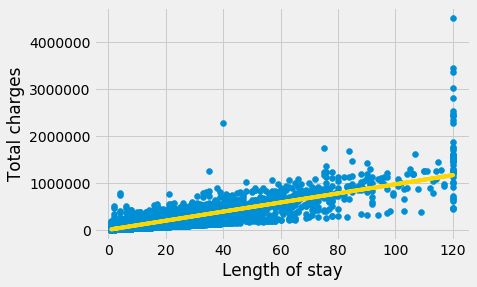

In [6]:
# print(l)
# print(type(l))
# print(np.array(Charges))
Y = np.array(Charges)
t = Table().with_columns('X', l, 'Y', Y)
t.show(20)
plt.scatter(l, Charges)
plt.plot(t.column(0), fit(t, 0, 1), lw=4, color='gold')
plots.xlabel('Length of stay')
plots.ylabel('Total charges')

In [7]:
#Calculate the Correlation coefficient between two features
correlation(t, 'X', 'Y')

0.8697378113668287

In [8]:
# Reshape features and label
X = l
Y = np.array(Charges)
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

# Applying Linear Regression 

In [9]:
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=25) 

reg = LinearRegression().fit(X_train, Y_train)


In [10]:
reg.predict([[13]])

array([[127797.91376791]])

In [11]:
from sklearn.metrics import average_precision_score
reg.score(X_test, Y_test)

0.8021953468576694